In [1]:
## Data processing and visualization.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Machine learning libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Evaluation of the models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
## Reading dataset
df = pd.read_csv('Churn_Modelling.csv')
## Checking the columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
## Checking for duplicate data
df[df.duplicated]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


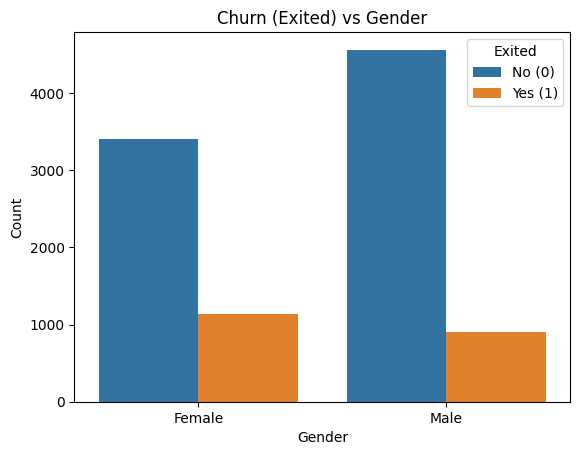

In [5]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Churn (Exited) vs Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No (0)", "Yes (1)"])
plt.show()

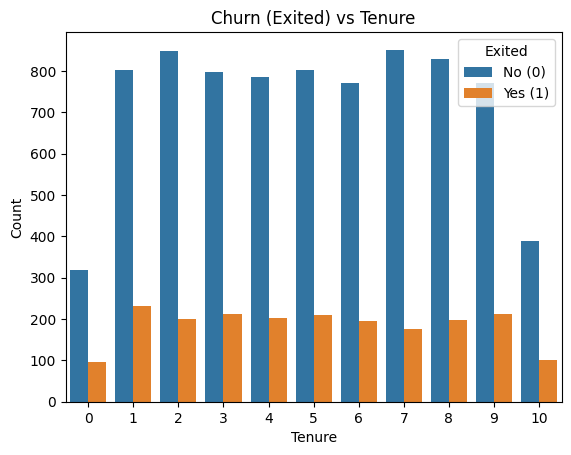

In [6]:
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title("Churn (Exited) vs Tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No (0)", "Yes (1)"])
plt.show()

In [7]:
## One hot encoding
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [8]:
## Checking the dataframe
df.tail()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0
9999,10000,15628319,Walker,792,0,28,4,130142.79,1,1,0,38190.78,0,0,0


In [9]:
## Feature Selection
features = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']

X = df[features]
y = df['Exited']

In [10]:
## Creating train and test dataset
## Random state is used so that you can access exactly same data in the future using the same number.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
## Feature scaling. Making sure all data are in similar scale to increase model performance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
## Checking train test data
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

In [13]:
## Creating random forest classifier.
## n_estimators is an integer that signifies the number of trees that would be created during computation.
## The estimators number depends on the use case and can also be tweaked using hyperparameter tuning.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
## Making prediction
y_pred = model.predict(X_test)

In [15]:
## Calculating accuracy
## Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


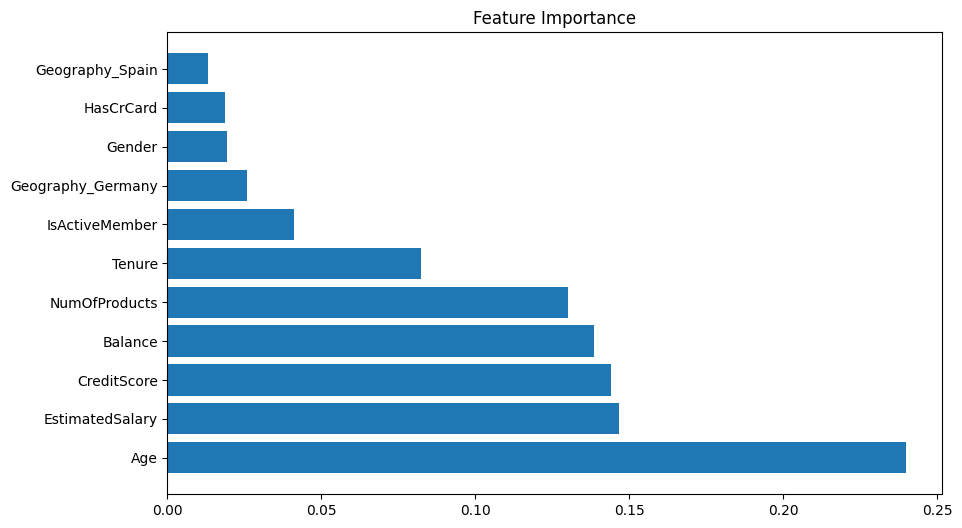

In [ ]:
## Creating bar plot for feature importances
importances = model.feature_importances_ ## Array of feature importances
indices = np.argsort(importances)[::-1] ## Creating importance indices in reverse order
names = [features[i] for i in indices] ## Creating list of names from the indices

## Creating plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices]) ## Horizontal bar chart
plt.yticks(range(X.shape[1]), names)
plt.show()

In [ ]:
## Logistic regression
from sklearn.linear_model import LogisticRegression

## Building Model
log_reg = LogisticRegression(random_state=42) ## Same random state
log_reg.fit(X_train, y_train)

## Making Prediction based on X_test data
y_pred_log_reg = log_reg.predict(X_test)

## Evaluating the model
conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(conf_mat_log_reg, class_report_log_reg, accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


In [20]:
from sklearn.svm import SVC

## Building and training SVM model
svm_model = SVC(kernel='linear', random_state=42) ## Again, same random state used
svm_model.fit(X_train, y_train)

## Making predictions
y_pred_svm = svm_model.predict(X_test)

## Evaluating the model
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(conf_mat_svm, class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Building and training the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


## Making prediction
y_pred_knn = knn_model.predict(X_test)

## Evaluate the model
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(conf_mat_knn, class_report_knn, accuracy_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

## Building and training the model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42) ## No. of trees and random state
gbm_model.fit(X_train, y_train)

## Making prediction
y_pred_gbm = gbm_model.predict(X_test)

## Evaluating the model
conf_mat_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print(conf_mat_gbm, class_report_gbm, accuracy_gbm)

[[1543   64]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


In [26]:
## Performing feature engineering to check if the models perform better

df = pd.read_csv('Churn_Modelling.csv')

## Binary features for balancezero
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

## Creating age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

## Creating balance to salary ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

## Interaction feature between Numofproducts and isactivemember
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

## Creating tenure group
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], labels=['0-2', '3-5', '6-7', '8-10'])

In [27]:
## Label Encoding
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df['Male_Germany'] = df['Gender'] * df['Geography_Germany'] ## Because male = 1
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

In [28]:
## One hot encoding
df = pd.get_dummies(df, columns=['AgeGroup', 'TenureGroup'], drop_first=True)

In [ ]:
## Checking the dataset 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_66-75,AgeGroup_76-85,AgeGroup_86-95,TenureGroup_3-5,TenureGroup_6-7,TenureGroup_8-10
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,...,0,1,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,...,0,1,0,0,0,0,0,0,0,1
3,4,15701354,Boni,699,0,39,1,0.00,2,0,...,0,1,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
## Feature Engineering
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
            'EstimatedSalary', 'Geography_Germany','Geography_Spain', 'BalanceZero', 'BalanceToSalaryRatio', 'ProductUsage', 
            'Male_Germany', 'Male_Spain'] + [ col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]

X = df[features]
y = df['Exited']

In [32]:
## Creating train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
## Feature scaling. Making sure all data are in similar scale to increase model performance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
## Creating random forest classifier.
## n_estimators is an integer that signifies the number of trees that would be created during computation.
## The estimators number depends on the use case and can also be tweaked using hyperparameter tuning.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

## Making prediction
y_pred = model.predict(X_test)

## Calculating accuracy
## Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix, class_report, accuracy)

[[1547   60]
 [ 210  183]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000
 0.865
